In [1]:
import sys
import os
import cv2
import tensorflow.keras.backend as K
import numpy as np
from numpy import asarray
from core.networks import UNET
from PIL import Image as im
K.set_image_data_format('channels_first')
os.environ['KERAS_BACKEND'] = "tensorflow"
vid_arr = np.zeros(shape=(2, 256, 512, 3), dtype="uint8")
image1 = im.open('./model_weights_for 512x256 1ep/000350.png')
image2 = im.open('./model_weights_for 512x256 1ep/000352.png')
vid_arr[0] = cv2.resize(asarray(image1), (512, 256))
vid_arr[1] = cv2.resize(asarray(image2), (512, 256))

model = UNET((6, 256, 512))
model.load_weights('./model_weights_for 512x256 5 ep/model_weights.hdf5')

pred = model.predict(np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0))
res = (np.transpose(pred[0], (1, 2, 0))*255).astype("uint8")
img = im.fromarray(res)
img.save('./model_weights/out.png')

# print(len(res))

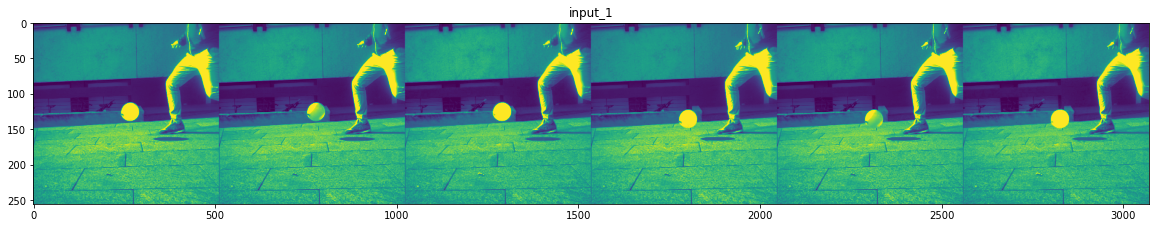

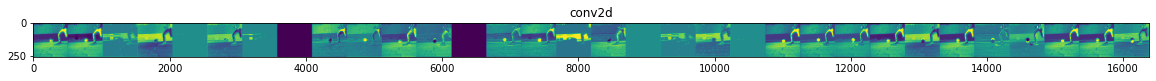

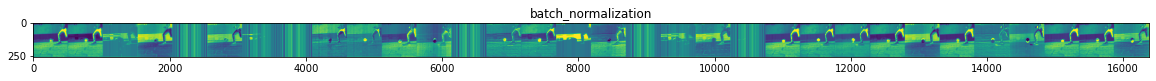

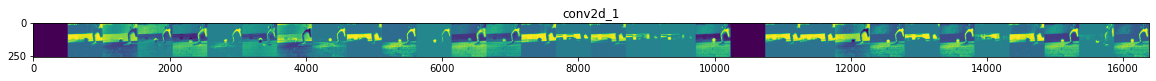

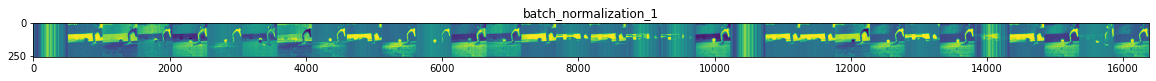

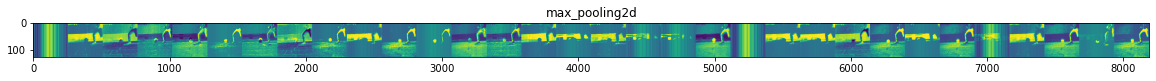

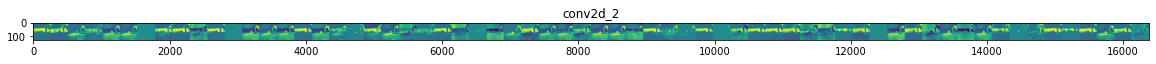

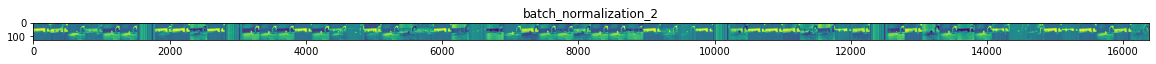

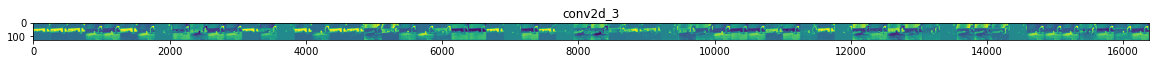

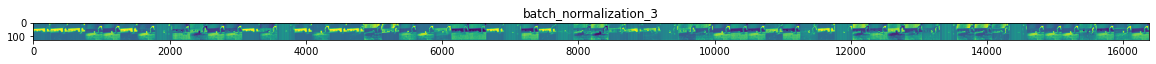

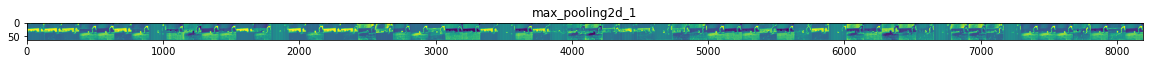

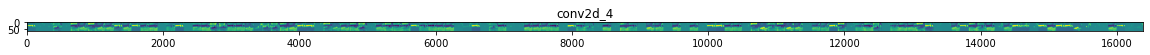

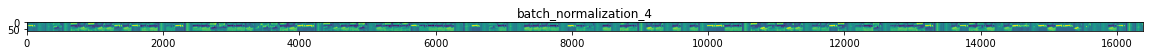

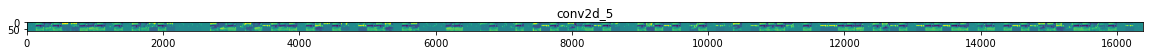

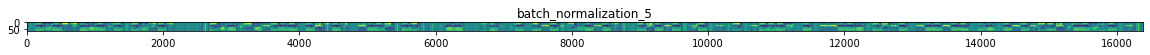

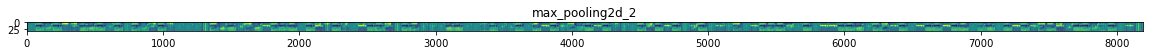

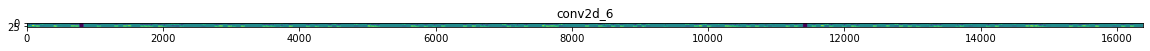

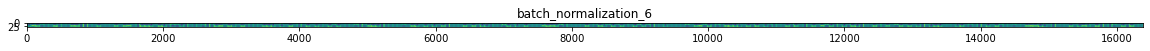

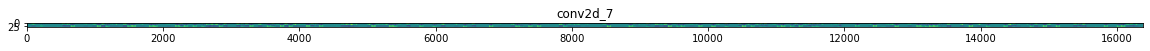

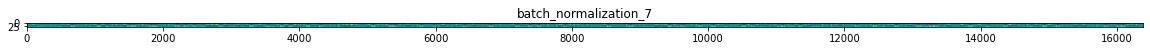

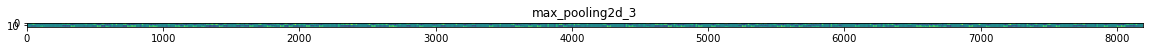

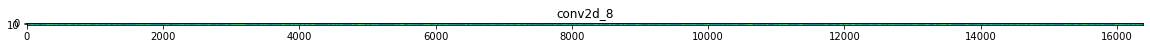

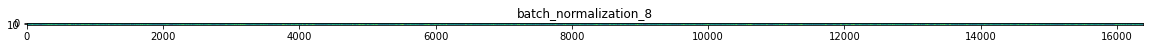

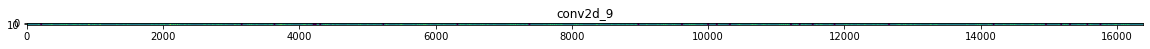

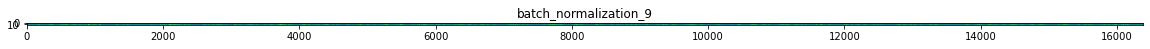

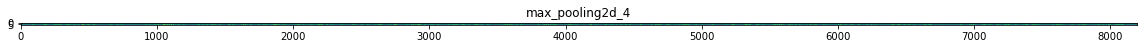

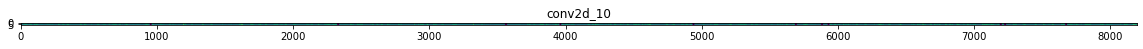

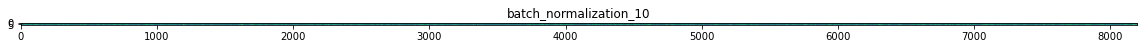

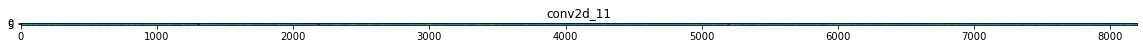

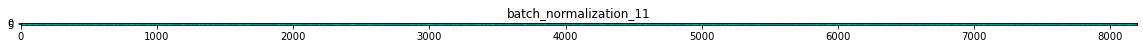

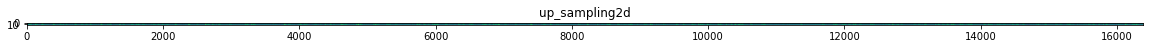

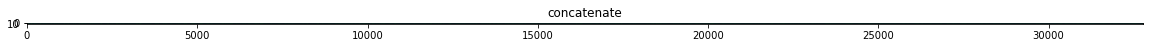

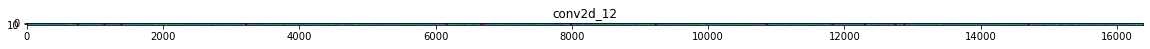

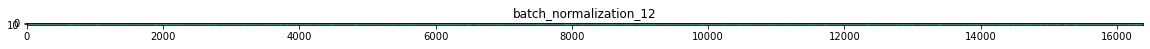

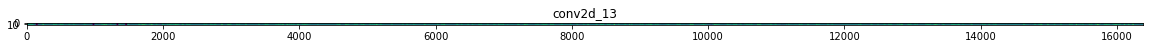

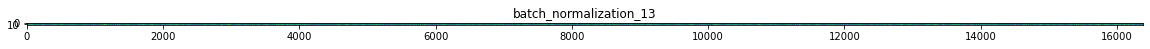

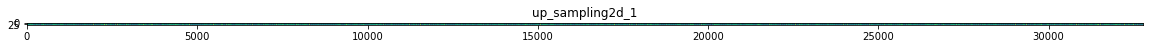

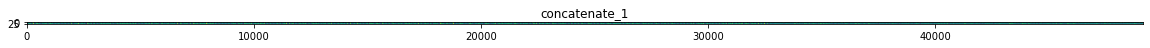

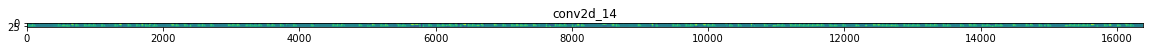

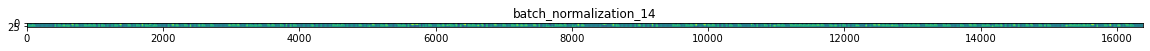

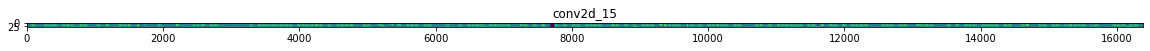

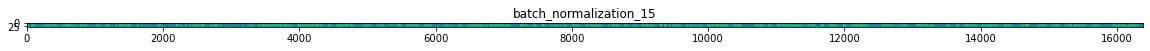

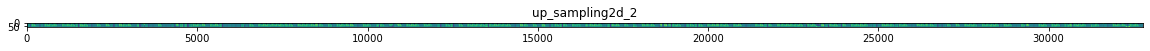

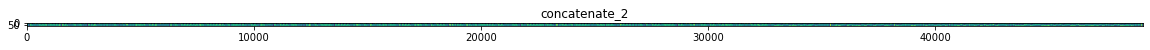

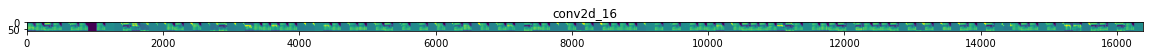

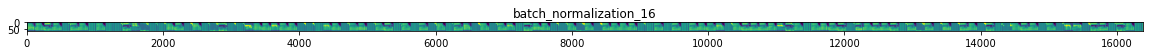

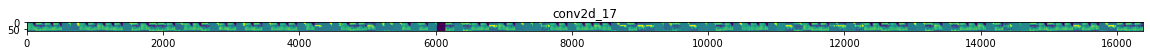

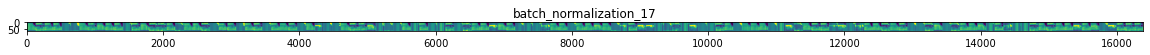

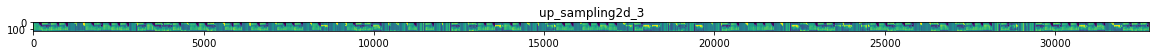

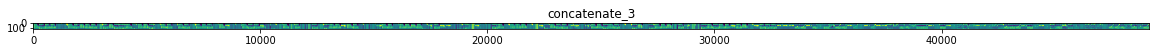

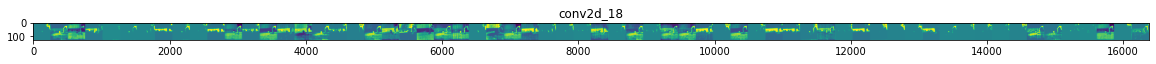

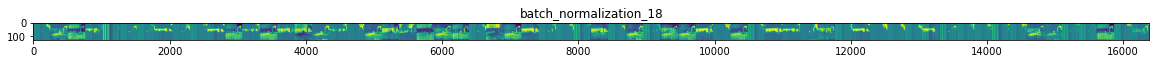

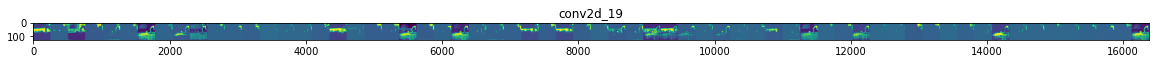

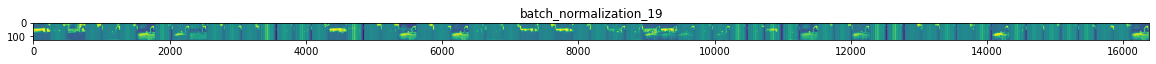

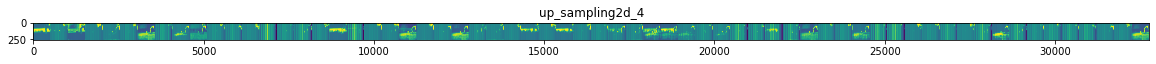

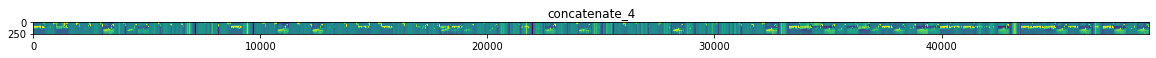

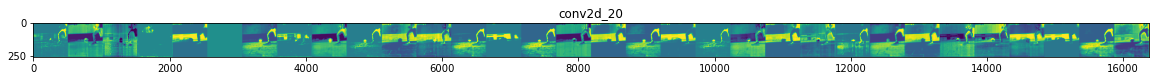

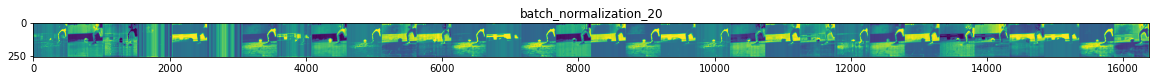

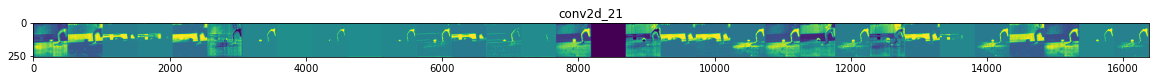

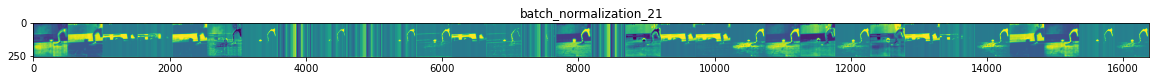

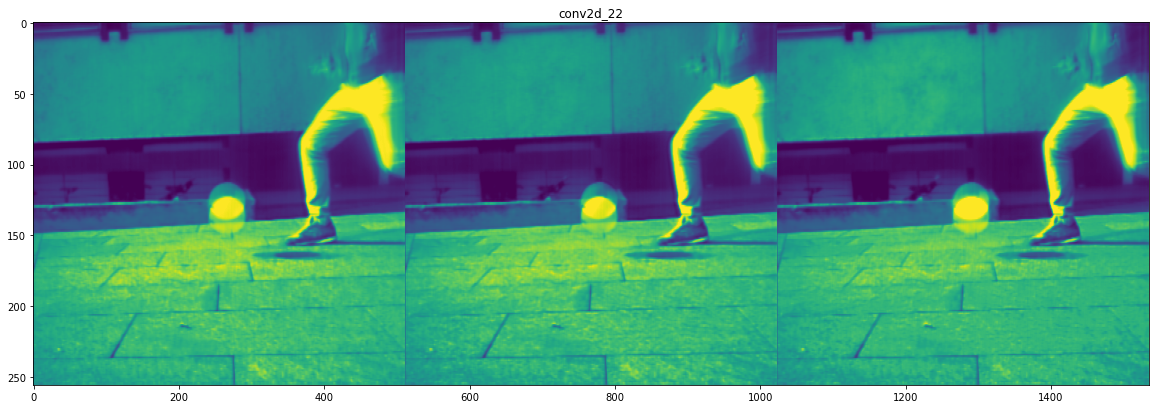

In [4]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
img_path='./model_weights_for 512x256 1ep/000350.png'
img_path1= './model_weights_for 512x256 1ep/000352.png'
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tensorflow.keras.models.Model(inputs = model.input, outputs = successive_outputs)
import matplotlib.pyplot as plt

img = load_img(img_path, target_size=(256, 512))
img1 = load_img(img_path1, target_size=(256, 512))

# x1   = img_to_array(img)  
# x2 = img_to_array(img1)                         
# x1   = x1.reshape((1,) + x1.shape)
# x2   = x2.reshape((1,) + x2.shape)
# # model.input.shape

# x1 /= 255.0
# x2 /= 255.0

# x = 
# x1.shape
x = np.expand_dims(np.transpose(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., (2,0,1)), axis=0)
# print(x.shape)
# x = np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255
successive_feature_maps = visualization_model.predict(x)
# x = np.expand_dims(np.concatenate((vid_arr[0], vid_arr[1]), axis=2)/255., axis=0)
# print(x.shape)
layer_names = [layer.name for layer in model.layers]
for i in layer_names:
  os.mkdir(f'./feature_maps/{i}')
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  # print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[ 1]  # number of features in the feature map
    size       = feature_map.shape[-1]
    size1 = feature_map.shape[-2]  # feature map shape (1, size, size, n_features)
    # print(n_features)
    # print(size)
    # We will tile our images in this matrix
    display_grid = np.zeros((size1, size * n_features))
    for i in range(n_features):
      x  = feature_map[0, i,:, :]
      # print(x.shape)
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
      feature_img = im.fromarray(x)
      feature_img.save(f'./feature_maps/{layer_name}/{i}.png')
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto')

conv2d 32
32


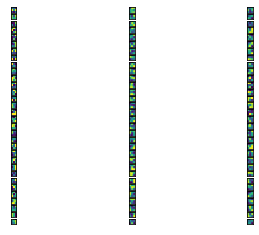

conv2d_1 32
32


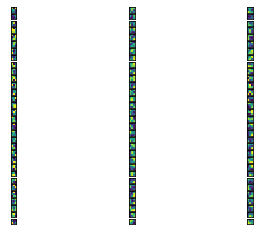

conv2d_2 64
64


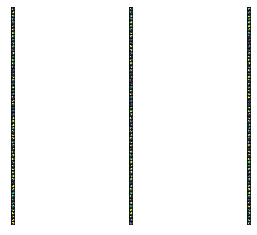

conv2d_3 64
64


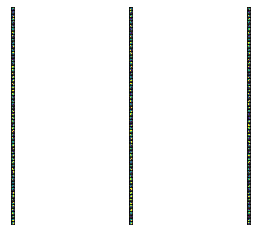

conv2d_4 128
128


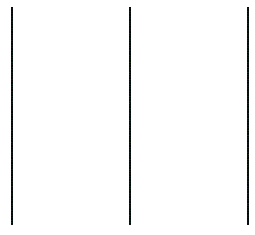

conv2d_5 128
128


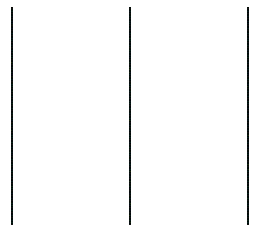

conv2d_6 256
256


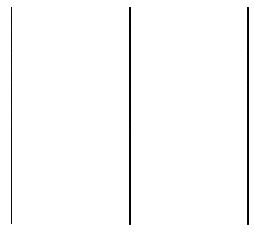

conv2d_7 256
256


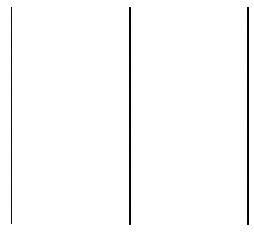

conv2d_8 512
512


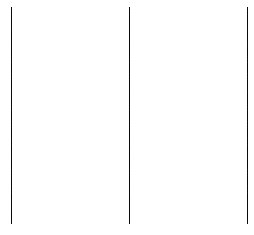

conv2d_9 512
512


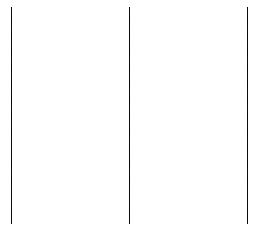

conv2d_10 512
512


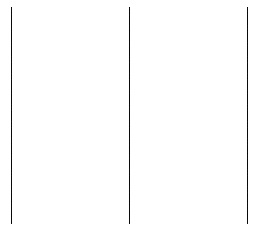

conv2d_11 512
512


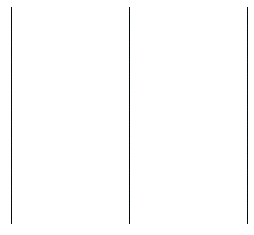

conv2d_12 512
512


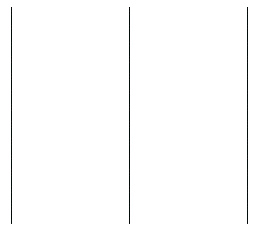

conv2d_13 512
512


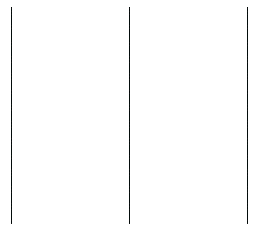

conv2d_14 256
256


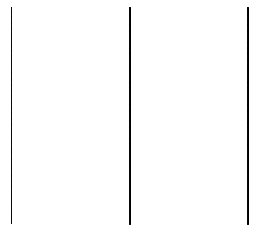

conv2d_15 256
256


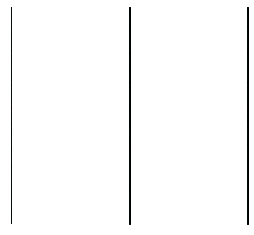

conv2d_16 128
128


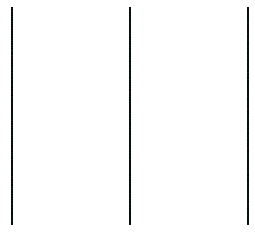

conv2d_17 128
128


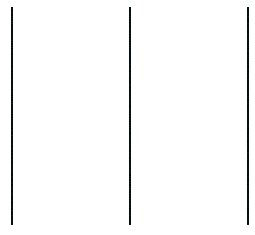

conv2d_18 64
64


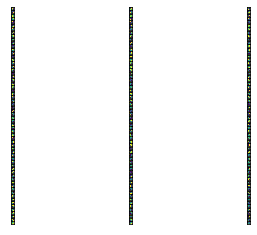

conv2d_19 64
64


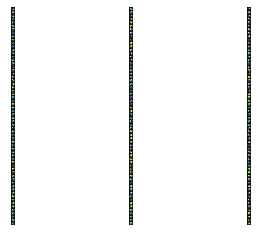

conv2d_20 32
32


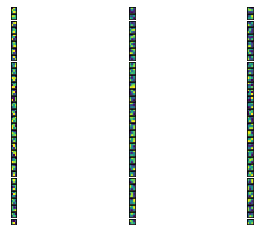

conv2d_21 32
32


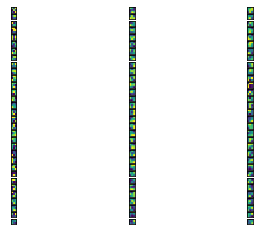

conv2d_22 3
3


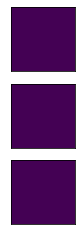

In [12]:
import matplotlib.pyplot as plt
for layer in model.layers:
  if 'conv' in layer.name:
    weights, bias= layer.get_weights()
    print(layer.name, layer.filters)
    f_min, f_max = weights.min(), weights.max()
    filters = (weights - f_min) / (f_max - f_min)  
    print(filters.shape[3])
    filter_cnt=1
    for i in range(filters.shape[3]):
      #get the filters
      filt=filters[:,:,:, i]
      #plotting each of the channel, color image RGB channels
      for j in range(filters.shape[0]):
        ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt[:,:, j])
        filter_cnt+=1
    plt.show()
